In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Read the transposed CSV file into a DataFrame
file_path = '1_2.csv'  # Adjust the path to your CSV file
df = pd.read_csv(file_path, index_col=0)

# Step 2: Transpose the DataFrame to have classifiers as rows and metrics as columns
df = df.transpose()

# Step 3: Reset the index to have classifiers as a column
df.reset_index(inplace=True)
df.rename(columns={'index': 'Classifier'}, inplace=True)

# Step 4: Display the transposed DataFrame
print("Transposed DataFrame:")
print(df)

# Step 5: Calculate descriptive statistics
print("\nDescriptive Statistics:")
print(df.describe())


Transposed DataFrame:
Classifier                Classifier  Accuracy  F1-Score  Precision  Recall
0           best of M1 and M2 models     0.700     0.690      0.660   0.760
1                         HIVECOTEV2     0.660     0.655      0.663   0.660
2                              Hydra     0.681     0.678      0.684   0.681
3                        MultiRocket     0.639     0.632      0.633   0.639
4                   Proximity Forest       NaN       NaN        NaN     NaN
5                   Elastic Ensemble     0.610     0.609      0.616   0.610
6                       Fresh Prince     0.469     0.469      0.470   0.469
7                            TSFresh     0.634     0.633      0.637   0.634
8                              DrCIF     0.614     0.614      0.620   0.614
9                              rSTSF     0.655     0.654      0.659   0.655
10                              RDST     0.671     0.667      0.673   0.671
11                             MrSQM     0.618     0.618      0.62

In [2]:

# Step 6: Calculate the mean rank for each classifier based on all metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
df['Mean_Rank'] = df[metrics].mean(axis=1)
df = df.sort_values(by='F1-Score', ascending=False)


In [3]:

# Step 7: Display the ranked DataFrame
print("\nRanked DataFrame:")
print(df[['Classifier', 'F1-Score']])



Ranked DataFrame:
Classifier                Classifier  F1-Score
13                               TDE     0.713
0           best of M1 and M2 models     0.690
2                              Hydra     0.678
12                          Weasel-D     0.671
10                              RDST     0.667
1                         HIVECOTEV2     0.655
9                              rSTSF     0.654
16                          ridge_cv     0.654
7                            TSFresh     0.633
3                        MultiRocket     0.632
11                             MrSQM     0.618
8                              DrCIF     0.614
5                   Elastic Ensemble     0.609
6                       Fresh Prince     0.469
14                    Inception Time     0.085
4                   Proximity Forest       NaN
15                            ResNet       NaN


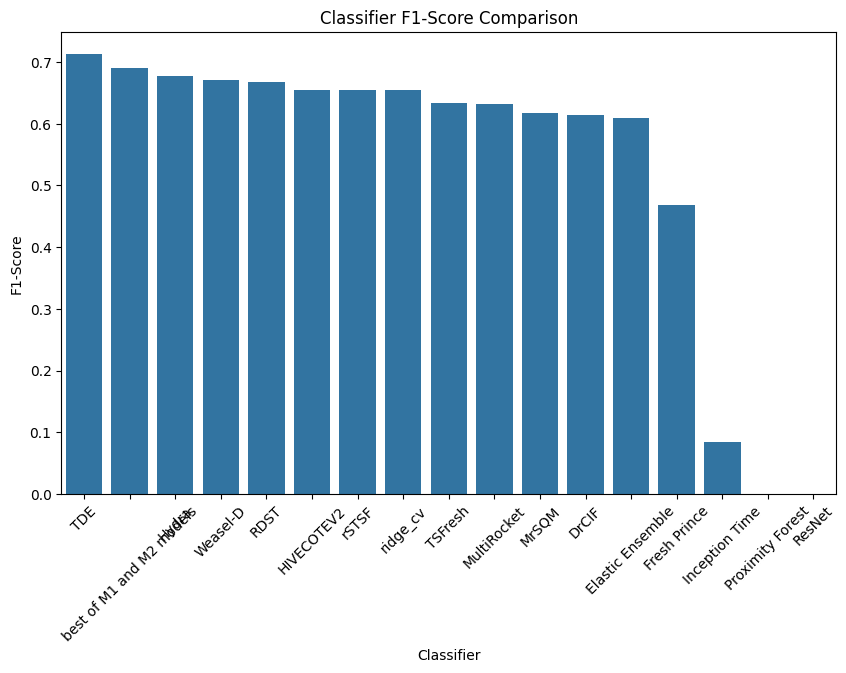

In [4]:

# Step 8: Plot accuracy comparison
plt.figure(figsize=(10, 6))
sns.barplot(x='Classifier', y='F1-Score', data=df)
plt.xticks(rotation=45)
plt.title('Classifier F1-Score Comparison')
plt.show()


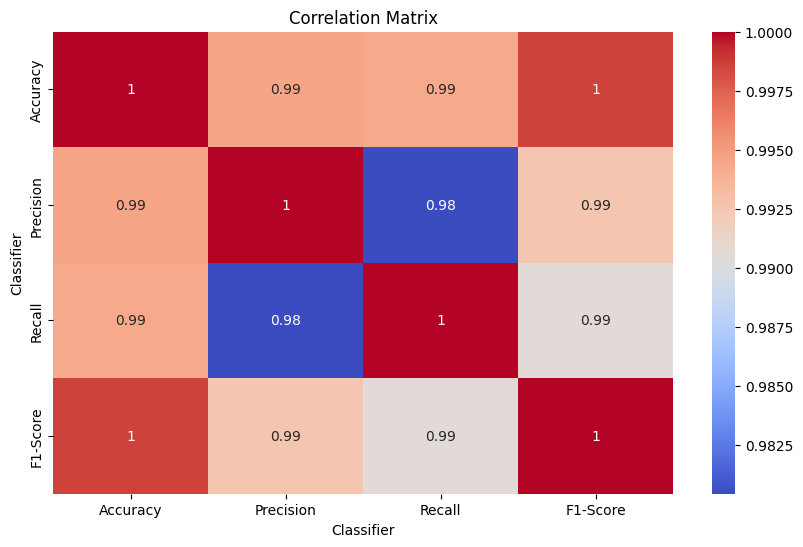

In [5]:

# Step 9: Plot correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(df[metrics].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()
